In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in data
df = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

In [3]:
#select relevant columns for analysis
mau = df[['call_date','new_listener_ever']]

In [4]:
#convert not null values (integer) to Yes in new_listener_ever column
mau.loc[mau['new_listener_ever'].notnull(), 'new_listener_ever'] = "Yes"

In [5]:
#convert not-a-number values (NaN) to No in new_listener_ever column
mau['new_listener_ever'] = mau['new_listener_ever'].replace(np.nan, "No")

In [6]:
#convert call_date data type from object to datetime
mau['call_date'] = pd.to_datetime(mau.call_date)

In [7]:
#extract month from call_date column 
mau['Month'] = mau['call_date'].dt.month_name()

In [8]:
#remove call_date column
mau.drop('call_date', inplace = True, axis=1)

In [9]:
#clean up new_listener_ever column title
mau.rename(columns = {'new_listener_ever':'New Listeners'}, inplace = True)

In [10]:
#create function to replace subscriber_id as new listeners values with "Yes" values
def new (mau):
    if mau['New Listeners'] == "Yes":
        return "Yes"
    else:
        return np.NaN

In [11]:
mau['New'] = mau.apply(lambda mau: new(mau), axis=1)

In [12]:
#create function to replace NaN values with "No" to show current listeners
def current (mau):
    if mau['New Listeners'] == "No":
        return "Yes"
    else:
        return np.NaN

In [13]:
#create new column for current values 
mau['Current'] = mau.apply(lambda mau: current(mau), axis=1)

In [14]:
#drop new_listener_ever column
mau.drop('New Listeners', inplace = True, axis=1)

In [15]:
#count number of new and current listeners for each month
data = mau.groupby('Month').count().reset_index()

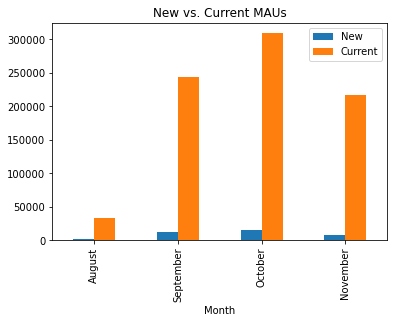

In [16]:
#plot data
order = ["August", "September", "October", "November"]
field = "Month"
ax = data.set_index(field).loc[order].plot(kind="bar", legend=True)
ax.set_title("New vs. Current MAUs")
plt.savefig('New_vs_Current_MAUs.jpeg', bbox_inches='tight')

**Note**: for when connecting to full database, change `order` to include all 12 months